# Evaluation: COPAC clustering on real-world data

This notebook presents results of COPAC clustering algorithm on real-world data. First is famous dataset iris to demonstrate low dimensional space and image segmentation data, as second dataset, to evaluate algorithms on high-dimensional data. We are comparing our implementation of the algorithm with implementation from the data mining software ELKI. All results are visualized and evaluated by measures comparing clusters similarity.

In [1]:
# enable print in notebook and set size of figures
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 9)

# data mining libraries
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
from scipy.io import arff
from sklearn.metrics import adjusted_mutual_info_score, accuracy_score, v_measure_score, normalized_mutual_info_score

# add parent package
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# import our implementation of copac
from copac import COPAC, copac
# import copac implementation of ELKI
from elki import elki_copac

Populating the interactive namespace from numpy and matplotlib


## 1. Iris dataset

Iris contains four features regarding the shape of a flower and three final classes of the plant's species. Let's first visualize the dataset coloured by true labels.

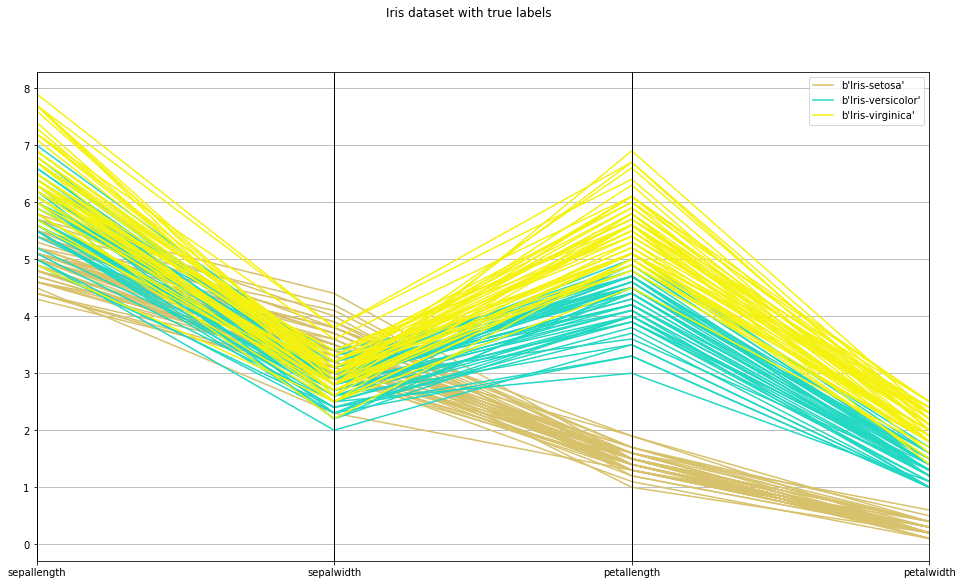

In [2]:
data, meta = arff.loadarff('iris.arff')
df_true = pd.DataFrame(data, columns=meta.names())
X = df_true.loc[:, df_true.columns != 'class']
y = df_true['class']
    
# plot
parallel_coordinates(df_true, "class")
plt.suptitle("Iris dataset with true labels")
plt.show()

To exetuce COPAC algorithm, we have to define following parameters:

- k : int
        Size of local neighborhood for local correlation dimensionality.
        The paper suggests k >= 3 * n_features.
- mu : int
        Minimum number of points in a cluster with mu <= k.
- eps : float
        Neighborhood predicate, so that neighbors are closer than `eps`.

Below, the parameters for this evaluation are defined.

In [3]:
k = 8
mu = 8
eps = 1
alpha = 0.85

### Our implementation of COPAC

Let's see how our implementation of COPAC algorithm will solve the introduced clustering problem.

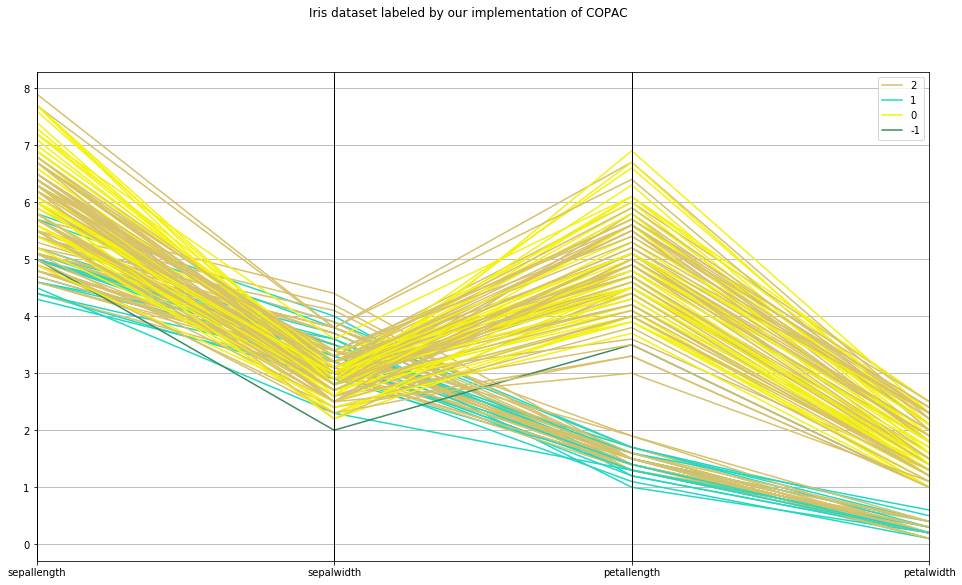

In [4]:
clst = COPAC(k=k, mu=mu, eps=eps, alpha=alpha, algorithm='auto')
y_our = clst.fit_predict(X)
df_our = X.copy()
df_our['class'] = y_our

# plot
parallel_coordinates(df_our, "class")
plt.suptitle("Iris dataset labeled by our implementation of COPAC")
plt.show()

The algorithm have chosen correctly 3 clusters (dark green points are noise). We can see that cluster 1 and 0 are well separated, however the cluster 2 interfere with both clusters in random manner. The versicolor class is not recognized from virginica. 

In [5]:
print('AMI', adjusted_mutual_info_score(y, y_our))
print('NMI', normalized_mutual_info_score(y, y_our))
print('V  ', v_measure_score(y, y_our))

AMI 0.219675841754
NMI 0.25141115013
V   0.250816669065


The measures shows that the algorithm performed poorly, however there were some patterns recognized.

### ELKI implementation of COPAC

Next, we discover how successful the ELKI implementation will be.

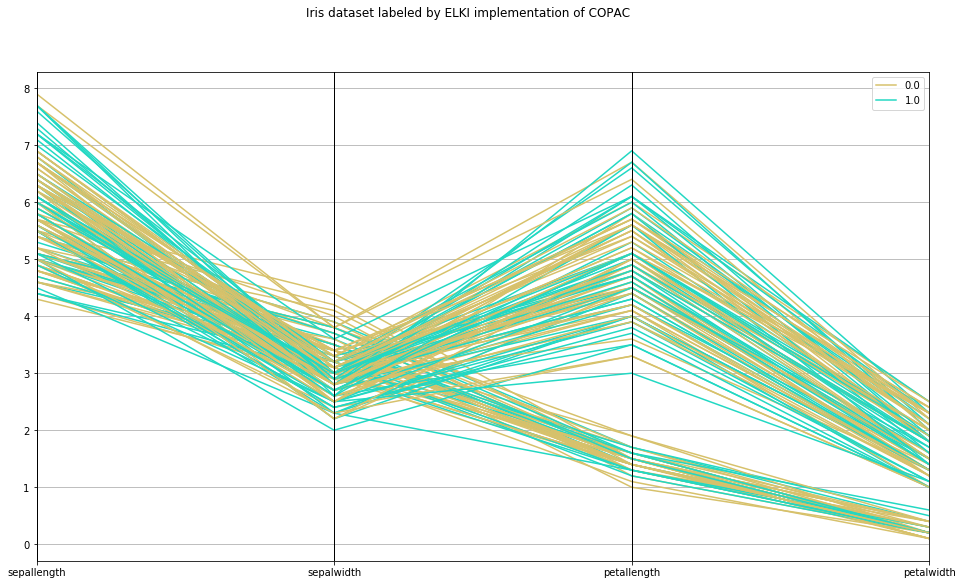

In [6]:
y_elki = elki_copac(X, k=k, mu=mu, eps=eps, alpha=alpha)
df_elki = X.copy()
df_elki['class'] = y_elki

# plot
parallel_coordinates(df_elki, "class")
plt.suptitle("Iris dataset labeled by ELKI implementation of COPAC")
plt.show()

In [7]:
print('AMI', adjusted_mutual_info_score(y, y_elki))
print('NMI', normalized_mutual_info_score(y, y_elki))
print('V  ', v_measure_score(y, y_elki))

AMI 0.0128809520686
NMI 0.0243273615463
V   0.0235902961213


Both scatter plot and measures indicate bad behaviour of the ELKI implementation. The number of clusters differs and they are more or less mixed together, giving no information, which is also proved by all three measures.

### Mutual correspondence 

In [8]:
print('AMI', adjusted_mutual_info_score(y_our, y_elki))
print('NMI', normalized_mutual_info_score(y_our, y_elki))
print('V  ', v_measure_score(y_our, y_elki))

AMI 0.0697462084972
NMI 0.0966990923285
V   0.0951450466264


The mutual agreement is cca 9% but it also visible from the visualizations, that the implementations produced very different result. Not even the number of clusters equals.

## 2. Image segmentation dataset

Dataset contains 19 features regarding an image, such as hue-mean, saturation-mean, region-pixel-count etc. Every image falls into one of these 7 categories: brickface, sky, foliage, cement, window, path, grass. They are our clusters of interest.

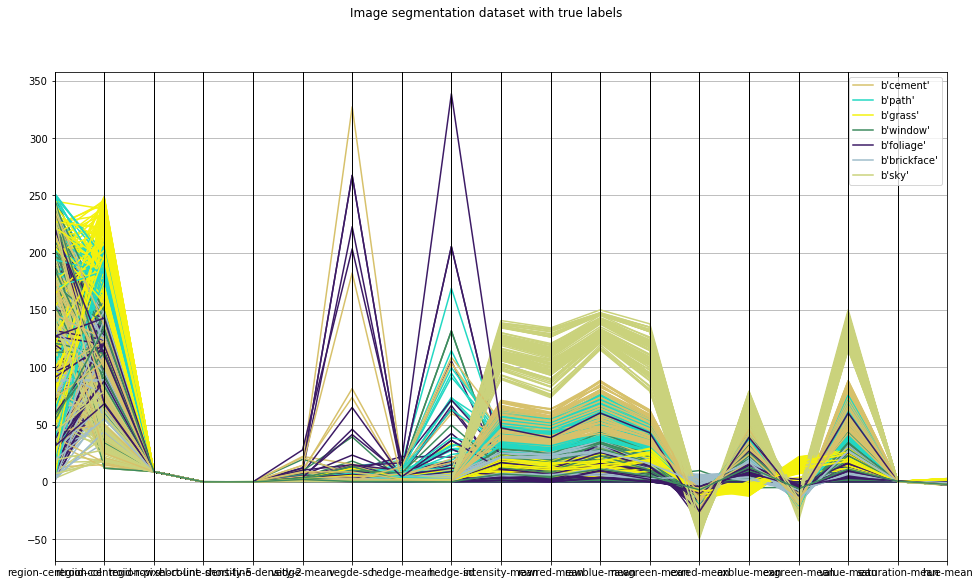

In [9]:
data, meta = arff.loadarff('segment-test.arff')
df_true = pd.DataFrame(data, columns=meta.names())
df_true
X = df_true.loc[:, df_true.columns != 'class']
y = df_true['class']

# plot
parallel_coordinates(df_true, "class")
plt.suptitle("Image segmentation dataset with true labels")
plt.show()

We can see that the segmentation data are much more compicated than the iris dataset.

In [10]:
k = 200
mu = 20
eps = 40
alpha = 0.85

### Our implementation of COPAC

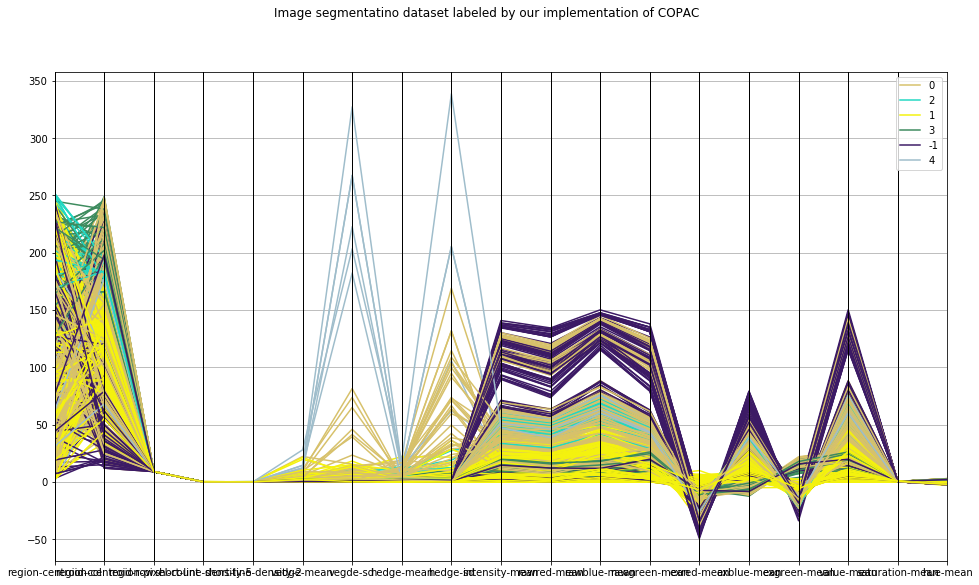

In [11]:
clst = COPAC(k=k, mu=mu, eps=eps, alpha=alpha, algorithm='auto')
y_our = clst.fit_predict(X)
df_our = X.copy()
df_our['class'] = y_our

# plot
parallel_coordinates(df_our, "class")
plt.suptitle("Image segmentatino dataset labeled by our implementation of COPAC")
plt.show()

In [12]:
print('AMI', adjusted_mutual_info_score(y, y_our))
print('NMI', normalized_mutual_info_score(y, y_our))
print('V  ', v_measure_score(y, y_our))

AMI 0.371991210505
NMI 0.443440442345
V   0.437880549725


The algorithm chose to divide points into 5 clusters. The scores are higher than in the case of low dimensional data, so the trend of increasing accuracy with dimensions occured here similarly as in the case of the artificial data. Nevertheless, the results are still quite poor for practical application. It is worth noting that the parameter epsilon plays crucial role, since it has to be large enough for large dimensional space, otherwise all the points are classified as noise.

### ELKI implementation of COPAC

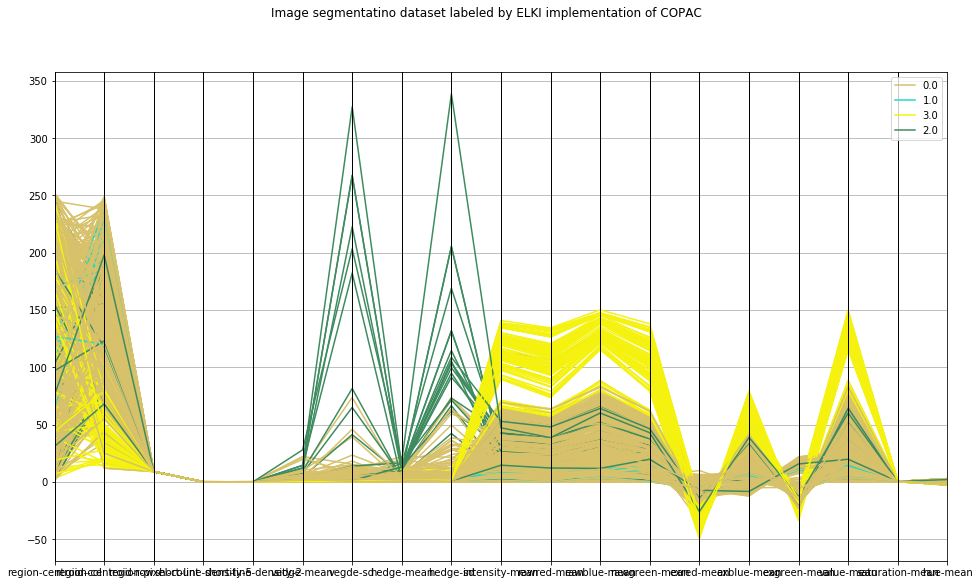

In [13]:
y_elki = elki_copac(X, k=k, mu=mu, eps=eps, alpha=alpha)
df_elki = X.copy()
df_elki['class'] = y_elki

# plot
parallel_coordinates(df_elki, "class")
plt.suptitle("Image segmentatino dataset labeled by ELKI implementation of COPAC")
plt.show()

In [14]:
print('AMI', adjusted_mutual_info_score(y, y_elki))
print('NMI', normalized_mutual_info_score(y, y_elki))
print('V  ', v_measure_score(y, y_elki))

AMI 0.196546935384
NMI 0.341550732882
V   0.298893252326


The ELKI implementation produced very similar results. Here, our implementation was even a bit better.


### Mutual correspondence 

In [15]:
print('AMI', adjusted_mutual_info_score(y_our, y_elki))
print('NMI', normalized_mutual_info_score(y_our, y_elki))
print('V  ', v_measure_score(y_our, y_elki))

AMI 0.251316573469
NMI 0.371170884103
V   0.347270156894
